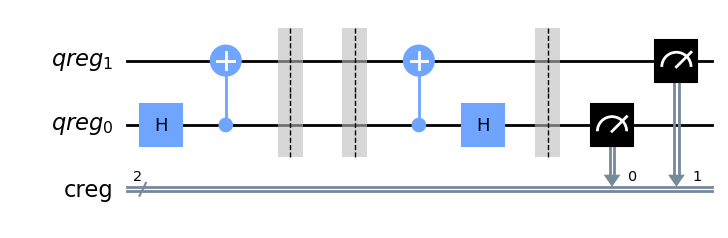

{'00': 100}


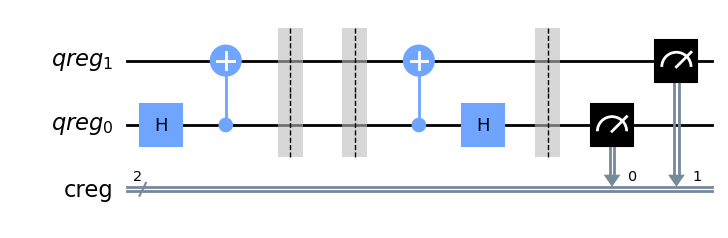

{'00': 100}


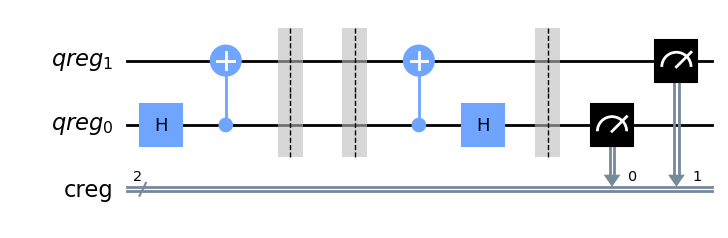

{'00': 100}


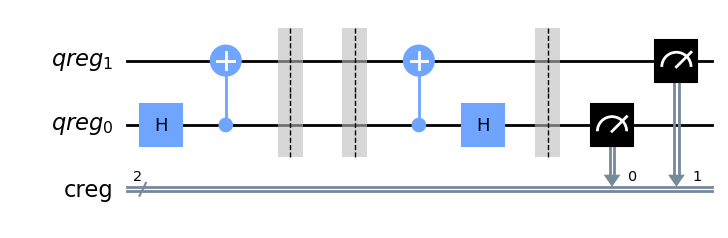

{'00': 100}


In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

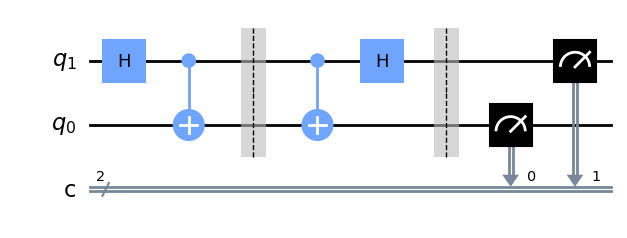

00 --> {'00': 100}


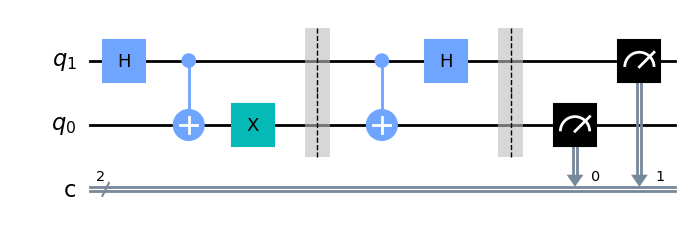

01 --> {'01': 100}


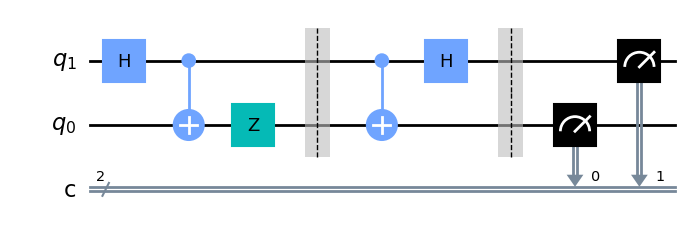

10 --> {'10': 100}


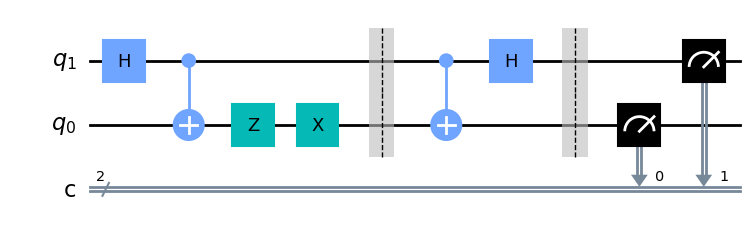

11 --> {'11': 100}


In [5]:
#Now if we change the encoder from Asja to Balvis we have the following results

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)